# OBJETIVO

Analizar un dataset de un eccommerce brasileño: 

Debido a que es un dataset pequeño, varias de las conclusiones van a ser poco robustas. Sin embargo, el objetivo principal es puramente académico y para demostrar varias de las técnicas que conozco.

Se va a realizar un análisis que estará a nivel de pedido ya que en el dataset no hay identificadores de otras entidades(producto, cliente...)

Localizar los tipos de pedidos que maximizan el potencial comercial en el mercado del ecommerce y las principales zonas donde buscarlos.

Para conseguir aumentar el beneficio de la empresa se va a recurrir al uso de tres palancas:

## Palancas
* Reducir gastos de envío
* Aumentar numero de pedidos
* Reducir pedidos cancelados

## KPI:
* Porcentaje de gastos de envio en las ventas
* Numero total de productos vendidos
* Tasa de pedidos cancelados
* Ingresos totales

## Preguntas semilla:
Habiendo entendido las palancas y kpis ya podemos plantear las preguntas semilla:

Sobre gastos de envío: 
* ¿Cuánto es el costo medio de envío por ciudad?
* ¿Que ciudades son las que más gastos de envío tienen?

Sobre pedidos cancelados:
* ¿Qué tipo de pedidos son los que más se cancelan?
* ¿Hay relación entre los pedidos cancelados con la cantidad de producto comprado? ¿Y con el valor de la compra? ¿Y con el hecho de ser de una ciudad?

Sobre ventas:
* ¿Que categoria de productos son los que más ingresos tienen en total? ¿Y de media(mediana)? ¿Cuál es la media de productos solicitados? ¿ Y la media de gastos de envio?
* ¿Hay ventas que se realicen más en festivos nacionales?
* ¿Cuál es la cantidad de producto por pedido? 
* ¿Qué dias hay mayor número de ventas? ¿Y cuáles hay mayores ingresos?
* ¿Cuáles son los momentos de la verdad? 

# CREACION DATAMART ANALITICO

## SET UP

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy = True
pd.options.display.float_format = '{:15.2f}'.format
sns.set(rc={'figure.figsize':(8,6)})

## CARGA DE DATOS

In [10]:
df = pd.read_csv('Data/olist_classified_public_dataset.csv')
df.head()

,Unnamed: 0,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,1,2,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,2,3,delivered,99.80,15.86,2,4,2018-01-15 15:50:42.000000,2018-01-17 07:29:56.419769,2018-02-05 00:00:00.000000,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,3,4,delivered,87.00,12.74,1,1,2018-02-04 11:16:42.000000,2018-02-06 05:31:50.990164,2018-03-13 00:00:00.000000,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,4,5,delivered,99.90,17.95,1,2,2017-12-07 11:58:42.000000,2017-12-08 02:36:49.587515,2018-01-03 00:00:00.000000,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega


## CALIDAD DE DATOS

### Tipos de variables

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3584 non-null   int64  
 1   id                             3584 non-null   int64  
 2   order_status                   3584 non-null   object 
 3   order_products_value           3584 non-null   float64
 4   order_freight_value            3584 non-null   float64
 5   order_items_qty                3584 non-null   int64  
 6   order_sellers_qty              3584 non-null   int64  
 7   order_purchase_timestamp       3584 non-null   object 
 8   order_aproved_at               3584 non-null   object 
 9   order_estimated_delivery_date  3584 non-null   object 
 10  order_delivered_customer_date  3467 non-null   object 
 11  customer_city                  3584 non-null   object 
 12  customer_state                 3584 non-null   o

### Selección variables

El análisis que se va a realizar son con las siguientes variables:

In [12]:
columnas = ['order_status',
     'order_products_value',
     'order_freight_value',
     'order_items_qty',
     'order_sellers_qty',
     'order_purchase_timestamp',
     'customer_city',
     'product_category_name']
df = df[columnas]
df

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,customer_city,product_category_name
0,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,Belo Horizonte,beleza_saude
1,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,Pocos de Caldas,brinquedos
2,delivered,99.80,15.86,2,4,2018-01-15 15:50:42.000000,Sao Jose dos Campos,ferramentas_jardim
3,delivered,87.00,12.74,1,1,2018-02-04 11:16:42.000000,Ribeirao Preto,informatica_acessorios
4,delivered,99.90,17.95,1,2,2017-12-07 11:58:42.000000,RIO DE JANEIRO,cama_mesa_banho
...,...,...,...,...,...,...,...,...
3579,shipped,69.99,8.90,1,1,2017-11-27 09:28:50.000000,RIO DE JANEIRO,brinquedos
3580,delivered,39.90,15.10,1,1,2017-05-11 12:29:55.000000,Mogi das Cruzes,esporte_lazer
3581,delivered,795.00,21.33,1,1,2017-05-21 20:15:25.000000,Araxa,relogios_presentes
3582,delivered,72.90,35.83,1,1,2017-09-29 16:05:14.000000,Braganca,malas_acessorios


In [13]:
df.columns = ['estatus',
             'valor_productos',
             'gastos_envio',
             'cantidad_producto',
             'cantidad_vendedores',
             'fecha',
             'ciudad_cliente',
             'categoria_producto'] 
df

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,fecha,ciudad_cliente,categoria_producto
0,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,Belo Horizonte,beleza_saude
1,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,Pocos de Caldas,brinquedos
2,delivered,99.80,15.86,2,4,2018-01-15 15:50:42.000000,Sao Jose dos Campos,ferramentas_jardim
3,delivered,87.00,12.74,1,1,2018-02-04 11:16:42.000000,Ribeirao Preto,informatica_acessorios
4,delivered,99.90,17.95,1,2,2017-12-07 11:58:42.000000,RIO DE JANEIRO,cama_mesa_banho
...,...,...,...,...,...,...,...,...
3579,shipped,69.99,8.90,1,1,2017-11-27 09:28:50.000000,RIO DE JANEIRO,brinquedos
3580,delivered,39.90,15.10,1,1,2017-05-11 12:29:55.000000,Mogi das Cruzes,esporte_lazer
3581,delivered,795.00,21.33,1,1,2017-05-21 20:15:25.000000,Araxa,relogios_presentes
3582,delivered,72.90,35.83,1,1,2017-09-29 16:05:14.000000,Braganca,malas_acessorios


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   estatus              3584 non-null   object 
 1   valor_productos      3584 non-null   float64
 2   gastos_envio         3584 non-null   float64
 3   cantidad_producto    3584 non-null   int64  
 4   cantidad_vendedores  3584 non-null   int64  
 5   fecha                3584 non-null   object 
 6   ciudad_cliente       3584 non-null   object 
 7   categoria_producto   3584 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 224.1+ KB


Pasamos la variable fecha a formato datetime

In [15]:
df.fecha = pd.to_datetime(df.fecha)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   estatus              3584 non-null   object        
 1   valor_productos      3584 non-null   float64       
 2   gastos_envio         3584 non-null   float64       
 3   cantidad_producto    3584 non-null   int64         
 4   cantidad_vendedores  3584 non-null   int64         
 5   fecha                3584 non-null   datetime64[ns]
 6   ciudad_cliente       3584 non-null   object        
 7   categoria_producto   3584 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 224.1+ KB


### Análisis de nulos

In [16]:
df.isna().sum().sort_values(ascending = False)

estatus                0
valor_productos        0
gastos_envio           0
cantidad_producto      0
cantidad_vendedores    0
fecha                  0
ciudad_cliente         0
categoria_producto     0
dtype: int64

No hay nulos en este dataset.

### Análisis de las variables numéricas

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
valor_productos,3584.00,133.24,3.50,48.00,79.99,146.99,4850.00,210.22
gastos_envio,3584.00,22.40,0.00,13.61,16.79,23.87,401.58,20.58
cantidad_producto,3584.00,1.10,1.00,1.00,1.00,1.00,8.00,0.45
cantidad_vendedores,3584.00,1.47,1.00,1.00,1.00,1.00,12.00,1.32
fecha,3584,2017-10-23 10:20:03.919921920,2017-02-22 18:56:05,2017-08-07 20:31:26,2017-11-02 12:54:26.500000,2018-01-12 03:18:16.249999872,2018-04-11 14:51:31,NaN


En valor_productos vemos que hay al menos un atípico por la parte de arriba que sesga la media, por tanto usaremos la mediana como medida de centralización más fiable.

### Análisis de las variables categóricas

In [18]:
df.estatus.nunique()

5

In [19]:
df.estatus.unique()

array(['delivered', 'shipped', 'processing', 'invoiced', 'canceled'],
      dtype=object)

In [20]:
df.estatus.value_counts()

estatus
delivered     3467
shipped         48
canceled        25
invoiced        24
processing      20
Name: count, dtype: int64

In [21]:
df.ciudad_cliente.nunique()

897

In [22]:
df.categoria_producto.nunique()

60

Apunte: En los análisis/gráficos que se van a realizar se incluyen los pedidos cancelados (25), lo cual sesga ligeramente el estudio debido a que por ejemplo en los ingresos no deberían de considerarse. De todas maneras esos pedidos se realizaron en un principio así que de momento vamos a tenerlos en cuenta en las ventas. Posteriormente se trabajará sobre los pedidos cancelados.

### Índice
Vamos a poner la fecha como el index.

In [23]:
df.set_index('fecha',inplace = True)
df.sort_index(inplace = True)
df

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto
fecha,,,,,,,
2017-02-22 18:56:05,delivered,9.99,24.35,1,1,Porto Velho,automotivo
2017-03-13 21:00:40,delivered,119.90,14.61,1,1,Contagem,cama_mesa_banho
2017-03-14 17:21:08,delivered,37.99,14.11,1,1,RIO DE JANEIRO,consoles_games
2017-03-20 09:13:51,delivered,279.00,80.11,1,1,Caxias,informatica_acessorios
2017-03-27 20:21:00,delivered,10.99,24.84,1,1,Imperatriz,telefonia
...,...,...,...,...,...,...,...
2018-04-09 19:23:57,delivered,84.26,14.68,1,1,Sao Paulo,cama_mesa_banho
2018-04-10 12:36:59,delivered,99.00,12.60,1,1,Itatiba,ferramentas_jardim
2018-04-11 00:27:42,delivered,56.97,12.80,1,1,Araraquara,alimentos


## TRANSFORMACION DE DATOS

Vamos a crear tres tipos de variables:
* Valor total por pedido
* Extraer componentes de fecha
* Variables de calendario: Festivos locales (Brasil)

In [24]:
df['valor_total_pedido'] = df['valor_productos'] * df['cantidad_producto']
df

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto,valor_total_pedido
fecha,,,,,,,,
2017-02-22 18:56:05,delivered,9.99,24.35,1,1,Porto Velho,automotivo,9.99
2017-03-13 21:00:40,delivered,119.90,14.61,1,1,Contagem,cama_mesa_banho,119.90
2017-03-14 17:21:08,delivered,37.99,14.11,1,1,RIO DE JANEIRO,consoles_games,37.99
2017-03-20 09:13:51,delivered,279.00,80.11,1,1,Caxias,informatica_acessorios,279.00
2017-03-27 20:21:00,delivered,10.99,24.84,1,1,Imperatriz,telefonia,10.99
...,...,...,...,...,...,...,...,...
2018-04-09 19:23:57,delivered,84.26,14.68,1,1,Sao Paulo,cama_mesa_banho,84.26
2018-04-10 12:36:59,delivered,99.00,12.60,1,1,Itatiba,ferramentas_jardim,99.00
2018-04-11 00:27:42,delivered,56.97,12.80,1,1,Araraquara,alimentos,56.97


Creamos una función que nos permita obtener todas las partes de la fecha, de manera que posteriormente podamos trabajar a partir de estas.

In [25]:
def componentes_fecha(dataframe):
    date = dataframe.index.date
    año = dataframe.index.year
    mes = dataframe.index.month
    dia = dataframe.index.day
    hora = dataframe.index.hour
    minuto = dataframe.index.minute
    segundo = dataframe.index.second
    
    
    return(pd.DataFrame({'date':date, 'año':año,'mes':mes, 'dia':dia, 'hora':hora, 'minuto':minuto, 'segundo':segundo}))

Unimos ambos dataframes.

In [26]:
df = pd.concat([df.reset_index(),componentes_fecha(df)], axis = 1).set_index('fecha')
df

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto,valor_total_pedido,date,año,mes,dia,hora,minuto,segundo
fecha,,,,,,,,,,,,,,,
2017-02-22 18:56:05,delivered,9.99,24.35,1,1,Porto Velho,automotivo,9.99,2017-02-22,2017,2,22,18,56,5
2017-03-13 21:00:40,delivered,119.90,14.61,1,1,Contagem,cama_mesa_banho,119.90,2017-03-13,2017,3,13,21,0,40
2017-03-14 17:21:08,delivered,37.99,14.11,1,1,RIO DE JANEIRO,consoles_games,37.99,2017-03-14,2017,3,14,17,21,8
2017-03-20 09:13:51,delivered,279.00,80.11,1,1,Caxias,informatica_acessorios,279.00,2017-03-20,2017,3,20,9,13,51
2017-03-27 20:21:00,delivered,10.99,24.84,1,1,Imperatriz,telefonia,10.99,2017-03-27,2017,3,27,20,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-09 19:23:57,delivered,84.26,14.68,1,1,Sao Paulo,cama_mesa_banho,84.26,2018-04-09,2018,4,9,19,23,57
2018-04-10 12:36:59,delivered,99.00,12.60,1,1,Itatiba,ferramentas_jardim,99.00,2018-04-10,2018,4,10,12,36,59
2018-04-11 00:27:42,delivered,56.97,12.80,1,1,Araraquara,alimentos,56.97,2018-04-11,2018,4,11,0,27,42


Importamos las fechas de dias festivos en Brasil

In [27]:
import holidays

festivo_bra = holidays.BRA(years=2017)
for fecha, fiesta in festivo_bra.items():
    print(fecha,fiesta)

2017-01-01 Confraternização Universal
2017-04-14 Sexta-feira Santa
2017-04-21 Tiradentes
2017-05-01 Dia do Trabalhador
2017-09-07 Independência do Brasil
2017-10-12 Nossa Senhora Aparecida
2017-11-02 Finados
2017-11-15 Proclamação da República
2017-12-25 Natal


In [28]:
festivo_bra = holidays.BRA(years=2017)
festivo_bra

{datetime.date(2017, 1, 1): 'Confraternização Universal', datetime.date(2017, 4, 14): 'Sexta-feira Santa', datetime.date(2017, 4, 21): 'Tiradentes', datetime.date(2017, 5, 1): 'Dia do Trabalhador', datetime.date(2017, 9, 7): 'Independência do Brasil', datetime.date(2017, 10, 12): 'Nossa Senhora Aparecida', datetime.date(2017, 11, 2): 'Finados', datetime.date(2017, 11, 15): 'Proclamação da República', datetime.date(2017, 12, 25): 'Natal'}

In [29]:
df['festivos'] = df.date.apply(lambda x: 1 if (x in festivo_bra) else 0)
df

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto,valor_total_pedido,date,año,mes,dia,hora,minuto,segundo,festivos
fecha,,,,,,,,,,,,,,,,
2017-02-22 18:56:05,delivered,9.99,24.35,1,1,Porto Velho,automotivo,9.99,2017-02-22,2017,2,22,18,56,5,0
2017-03-13 21:00:40,delivered,119.90,14.61,1,1,Contagem,cama_mesa_banho,119.90,2017-03-13,2017,3,13,21,0,40,0
2017-03-14 17:21:08,delivered,37.99,14.11,1,1,RIO DE JANEIRO,consoles_games,37.99,2017-03-14,2017,3,14,17,21,8,0
2017-03-20 09:13:51,delivered,279.00,80.11,1,1,Caxias,informatica_acessorios,279.00,2017-03-20,2017,3,20,9,13,51,0
2017-03-27 20:21:00,delivered,10.99,24.84,1,1,Imperatriz,telefonia,10.99,2017-03-27,2017,3,27,20,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-09 19:23:57,delivered,84.26,14.68,1,1,Sao Paulo,cama_mesa_banho,84.26,2018-04-09,2018,4,9,19,23,57,0
2018-04-10 12:36:59,delivered,99.00,12.60,1,1,Itatiba,ferramentas_jardim,99.00,2018-04-10,2018,4,10,12,36,59,0
2018-04-11 00:27:42,delivered,56.97,12.80,1,1,Araraquara,alimentos,56.97,2018-04-11,2018,4,11,0,27,42,0


# ANALISIS E INSIGHTS

## KPI 

### Numero total de productos vendidos 

In [30]:
df.cantidad_producto.sum()

3948

Se han vendido una cantidad de 3948 productos en todo el dataset.

### Ingresos totales

In [31]:
ingresos = df.valor_total_pedido.sum()
ingresos

563146.38

En total se ha vendido por valor de 563146 en este dataset

Vamos a analizar a nivel de categoria de producto:

### Porcentaje de gastos de envio en las ventas

In [32]:
gastos = df.gastos_envio.sum()
gastos

80282.81

In [33]:
porcentaje_gastos = gastos / ingresos * 100
porcentaje_gastos

14.256117565738414

Hay un porcentaje de 14% de gastos de envío en los ingresos totales. Por tanto hay que analizar posibles medidas para la reducción de estos gastos:

Vamos a crear una variable que sea gastos de envio por producto.

In [34]:
df['gastos_envio_por_producto'] = df.gastos_envio / df.cantidad_producto
df

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto,valor_total_pedido,date,año,mes,dia,hora,minuto,segundo,festivos,gastos_envio_por_producto
fecha,,,,,,,,,,,,,,,,,
2017-02-22 18:56:05,delivered,9.99,24.35,1,1,Porto Velho,automotivo,9.99,2017-02-22,2017,2,22,18,56,5,0,24.35
2017-03-13 21:00:40,delivered,119.90,14.61,1,1,Contagem,cama_mesa_banho,119.90,2017-03-13,2017,3,13,21,0,40,0,14.61
2017-03-14 17:21:08,delivered,37.99,14.11,1,1,RIO DE JANEIRO,consoles_games,37.99,2017-03-14,2017,3,14,17,21,8,0,14.11
2017-03-20 09:13:51,delivered,279.00,80.11,1,1,Caxias,informatica_acessorios,279.00,2017-03-20,2017,3,20,9,13,51,0,80.11
2017-03-27 20:21:00,delivered,10.99,24.84,1,1,Imperatriz,telefonia,10.99,2017-03-27,2017,3,27,20,21,0,0,24.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-09 19:23:57,delivered,84.26,14.68,1,1,Sao Paulo,cama_mesa_banho,84.26,2018-04-09,2018,4,9,19,23,57,0,14.68
2018-04-10 12:36:59,delivered,99.00,12.60,1,1,Itatiba,ferramentas_jardim,99.00,2018-04-10,2018,4,10,12,36,59,0,12.60
2018-04-11 00:27:42,delivered,56.97,12.80,1,1,Araraquara,alimentos,56.97,2018-04-11,2018,4,11,0,27,42,0,12.80


¿En qué ciudades hay mayor número de gastos de media?

In [35]:
df.groupby('ciudad_cliente').gastos_envio_por_producto.mean().sort_values(ascending = False)

ciudad_cliente
Penedo                           259.70
Cedro de Sao Joao                158.38
Castro                           153.84
Petrolina                        147.18
Coelho Neto                      131.09
                              ...      
Cajamar                            8.46
Santa Bárbara D'Oeste              8.29
Vinhedo                            8.03
Sao Manuel                         5.72
Brusque                            3.41
Name: gastos_envio_por_producto, Length: 897, dtype: float64

In [36]:
df[df.ciudad_cliente == 'Penedo']

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto,valor_total_pedido,date,año,mes,dia,hora,minuto,segundo,festivos,gastos_envio_por_producto
fecha,,,,,,,,,,,,,,,,,
2017-05-31 13:03:50,delivered,550.00,259.70,1,1,Penedo,beleza_saude,550.00,2017-05-31,2017,5,31,13,3,50,0,259.70


In [37]:
df[df.ciudad_cliente == 'Petrolina']

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto,valor_total_pedido,date,año,mes,dia,hora,minuto,segundo,festivos,gastos_envio_por_producto
fecha,,,,,,,,,,,,,,,,,
2017-10-05 10:28:57,delivered,1459.00,233.59,1,1,Petrolina,esporte_lazer,1459.00,2017-10-05,2017,10,5,10,28,57,0,233.59
2017-12-06 11:16:53,delivered,425.00,60.76,1,1,Petrolina,agro_industria_e_comercio,425.00,2017-12-06,2017,12,6,11,16,53,0,60.76


En las dos ciudades que más gastos por envío hay de media es en Penedo y Petrolina, sin embargo apenas hay registros para sacar conclusiones robustas. Vamos a seleccionar ciudades que tengan al menos 20 registros.

In [38]:
# Filtrar el DataFrame para quedarnos con las ciudades que tienen más de 20 registros
ciudades_con_mas_de_20_registros = df.groupby('ciudad_cliente').filter(lambda x: len(x) > 20)

# Calcular la media de los gastos de envío por producto para las ciudades filtradas
media_gastos_envio = ciudades_con_mas_de_20_registros.groupby('ciudad_cliente').gastos_envio_por_producto.mean()

# Ordenar los resultados de manera descendente
media_gastos_envio_ordenados = media_gastos_envio.sort_values(ascending=False)

# Mostrar los resultados
print(media_gastos_envio_ordenados)


ciudad_cliente
Fortaleza                         35.81
Belem                             25.74
Salvador                          24.72
Nova Iguacu                       24.10
Curitiba                          23.75
RIO DE JANEIRO                    21.72
Goiania                           20.15
BRASILIA                          18.68
Belo Horizonte                    18.61
Porto Alegre                      18.53
Niteroi                           17.69
OSASCO                            15.83
Campinas                          15.45
Sao Bernardo do Campo             14.88
Sao Jose dos Campos               14.61
SAO PAULO                         14.43
Sao Paulo                         14.03
Guarulhos                         13.58
Santos                            13.31
Name: gastos_envio_por_producto, dtype: float64


**INSIGHT 1**: Fortaleza es la ciudad en el que mayores gastos de envio de media hay. Se podría plantear una mejora de las condiciones logísticas en dicha ciudad.

### Tasa de pedidos cancelados

In [39]:
valor_confirmado = df[df.estatus != 'canceled'].valor_total_pedido.sum()
valor_confirmado

553861.83

In [40]:
valor_cancelado = df[df.estatus == 'canceled'].valor_total_pedido.sum()
valor_cancelado

9284.55

In [41]:
valor_cancelado / valor_confirmado * 100

1.6763296362199216

El **1,67%** de ingresos son pedidos cancelados, el cual se puede tratar de mejorar a pesar de que ya sea de por si un porcentaje bajo. Vamos a identificar que tipos de pedidos son propensos a cancelarse.

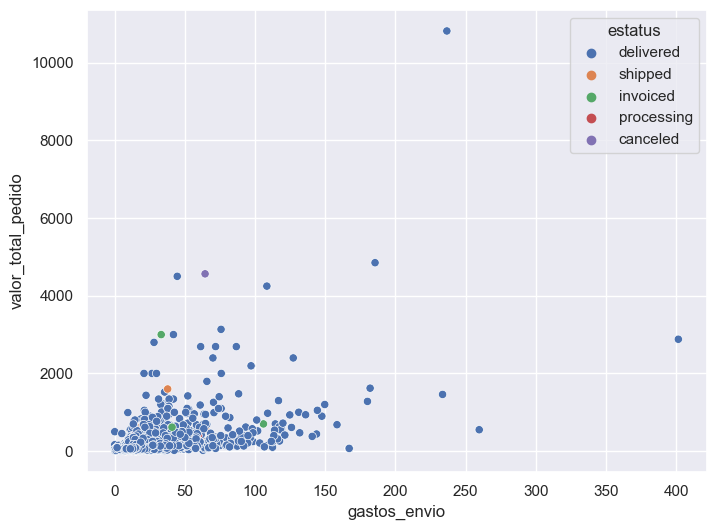

In [42]:
sns.scatterplot(x = df.gastos_envio, y = df.valor_total_pedido, hue = df.estatus);

No hay pedidos cancelados que sean por valor alto ni gastos de envio altos, tal vez sea por otras razones. 
Agrupamos por ciudad para ver primero cuales son las que mas valor aportan por pedido y luego lo mismo pero seleccionando unicamente las canceladas

In [43]:
df[df.estatus != 'canceled'].groupby('ciudad_cliente').valor_total_pedido.sum().sort_values(ascending = False)

ciudad_cliente
RIO DE JANEIRO                     50196.51
Sao Paulo                          50106.17
Belo Horizonte                     11986.76
BRASILIA                           11663.86
Pacoti                             10816.00
                                  ...      
Custodia                              13.98
Deputado Irapuan Pinheiro             13.98
Ipumirim                              13.98
Novo Progresso                        12.97
Candido Rodrigues                      9.90
Name: valor_total_pedido, Length: 893, dtype: float64

In [44]:
df[df.estatus == 'canceled'].groupby('ciudad_cliente').valor_total_pedido.sum().sort_values(ascending = False)

ciudad_cliente
Salvador                          4563.60
Sao Paulo                         1436.89
Santana de Parnaiba                783.14
Curitiba                           627.90
Pindamonhangaba                    449.99
Dumont                             425.00
Braganca Paulista                  169.90
Itaborai                           139.90
Pedro de Toledo                     99.89
RIO DE JANEIRO                      97.80
Camamu                              95.00
Belo Horizonte                      69.90
Goiania                             69.90
Ibira                               68.90
Jaboatao dos Guararapes             55.00
Maceio                              46.60
Niteroi                             31.84
Suzano                              29.90
Nova Iguacu                         23.50
Name: valor_total_pedido, dtype: float64

A priori las ciudades que más deberían cancelarse son las que mas compran, que son Sao Paulo o Rio de Janeiro. Pero se OBSERVA que la que mas se cancela es Salvador y con diferencia. 
Por tanto:

**INSIGHT 2**:
Salvador ocupa una gran parte de los pedidos cancelados y habría que realizar una investigación.

In [45]:
df

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto,valor_total_pedido,date,año,mes,dia,hora,minuto,segundo,festivos,gastos_envio_por_producto
fecha,,,,,,,,,,,,,,,,,
2017-02-22 18:56:05,delivered,9.99,24.35,1,1,Porto Velho,automotivo,9.99,2017-02-22,2017,2,22,18,56,5,0,24.35
2017-03-13 21:00:40,delivered,119.90,14.61,1,1,Contagem,cama_mesa_banho,119.90,2017-03-13,2017,3,13,21,0,40,0,14.61
2017-03-14 17:21:08,delivered,37.99,14.11,1,1,RIO DE JANEIRO,consoles_games,37.99,2017-03-14,2017,3,14,17,21,8,0,14.11
2017-03-20 09:13:51,delivered,279.00,80.11,1,1,Caxias,informatica_acessorios,279.00,2017-03-20,2017,3,20,9,13,51,0,80.11
2017-03-27 20:21:00,delivered,10.99,24.84,1,1,Imperatriz,telefonia,10.99,2017-03-27,2017,3,27,20,21,0,0,24.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-09 19:23:57,delivered,84.26,14.68,1,1,Sao Paulo,cama_mesa_banho,84.26,2018-04-09,2018,4,9,19,23,57,0,14.68
2018-04-10 12:36:59,delivered,99.00,12.60,1,1,Itatiba,ferramentas_jardim,99.00,2018-04-10,2018,4,10,12,36,59,0,12.60
2018-04-11 00:27:42,delivered,56.97,12.80,1,1,Araraquara,alimentos,56.97,2018-04-11,2018,4,11,0,27,42,0,12.80


### ¿Que productos son los que más ingresos tienen en total? ¿Y de media(mediana)? ¿Cuál es la media de productos solicitados? ¿ Y la media de gastos de envio?

In [46]:
df.groupby(['categoria_producto']).agg({
    'valor_total_pedido': ['sum', 'median'],
    'cantidad_producto': 'mean',
    'gastos_envio': 'mean'
}).sort_values(('valor_total_pedido', 'sum'), ascending=False).style.highlight_max()


**INSIGHT 3**:
Los productos que mas ingresos tienen son cama mesa y baño, accesorios de informática y decoración. Por tanto estaría bien seguir vendiendo más este tipo de productos.



Por otra parte estos tres datos a priori es algo que nos podriamos imaginar y tampoco es que arrojen información muy relevante:
* El producto que más ingresos aporta de media son los PCS
* El producto que mas gente compra son los alimentos
* El producto que más gastos de envío supone son muebles del jardín

### ¿Qué dias hay mayor número de pedidos? ¿Y cuáles hay mayores ingresos?

Vamos a observar que dias se realizan mas pedidos en todo el año.

In [47]:
df.date.value_counts().sort_values(ascending = False).head(30)

date
2017-11-24    57
2017-11-27    29
2017-11-25    28
2017-11-29    27
2018-02-13    26
2018-02-26    24
2017-10-16    23
2017-12-05    23
2017-08-16    22
2017-12-03    22
2017-12-07    21
2017-12-11    21
2017-10-10    21
2017-10-17    21
2018-02-05    20
2018-02-27    20
2017-11-26    20
2017-09-18    20
2018-01-12    20
2018-02-06    19
2018-01-31    19
2018-02-14    19
2017-11-23    19
2017-12-02    19
2017-11-10    19
2017-09-12    19
2018-01-15    18
2017-09-26    18
2017-07-13    18
2017-10-26    18
Name: count, dtype: int64

Lo pasamos a un gráfico para hacerlo más visual

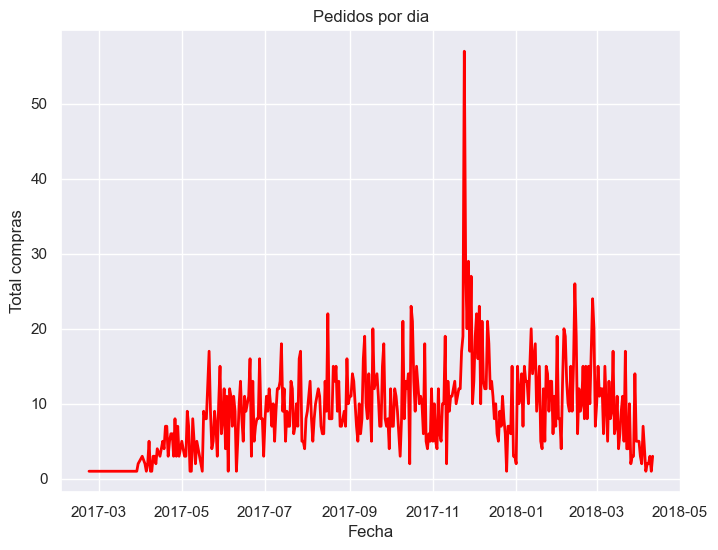

In [48]:
df.date.value_counts().sort_values(ascending = False).plot(
                        title = 'Pedidos por dia',
                        xlabel = 'Fecha',
                        ylabel = 'Total compras',
                        ls = '-', 
                        linewidth = 2, 
                        color = 'red',
                        grid = True);

Vamos a situarnos justo en dicho mes para observarlo con mayor precisión.

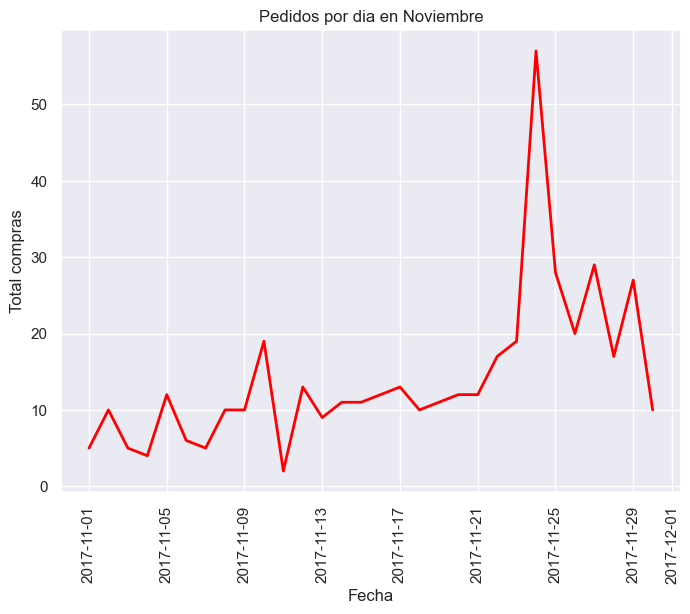

In [49]:
df.date[df.mes == 11].value_counts().sort_values(ascending = False).plot(
                        title = 'Pedidos por dia en Noviembre',
                        xlabel = 'Fecha',
                        ylabel = 'Total compras', 
                        ls = '-', 
                        linewidth = 2, 
                        color = 'red',
                        grid = True)
plt.xticks(rotation = 90);

Observamos que la ultima semana de noviembre es cuando mas pedidos se producen, que coincide con el Black Friday.

Analizamos los dias festivos:

In [50]:
df[df.festivos == 1].date.value_counts().sort_index()

date
2017-04-21     3
2017-05-01     5
2017-09-07     5
2017-10-12    13
2017-11-02    10
2017-11-15    11
2017-12-25     1
2018-01-01     2
2018-03-30     5
Name: count, dtype: int64

Los dias festivos no es que afecten especialmente en el numero de pedidos. Igualmente, el festivo en el que mas se compra es en el Independência do Brasil. 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3584 entries, 2017-02-22 18:56:05 to 2018-04-11 14:51:31
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   estatus                    3584 non-null   object 
 1   valor_productos            3584 non-null   float64
 2   gastos_envio               3584 non-null   float64
 3   cantidad_producto          3584 non-null   int64  
 4   cantidad_vendedores        3584 non-null   int64  
 5   ciudad_cliente             3584 non-null   object 
 6   categoria_producto         3584 non-null   object 
 7   valor_total_pedido         3584 non-null   float64
 8   date                       3584 non-null   object 
 9   año                        3584 non-null   int32  
 10  mes                        3584 non-null   int32  
 11  dia                        3584 non-null   int32  
 12  hora                       3584 non-null   int32  
 13  minuto      

C:\Users\iagzg\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iagzg\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


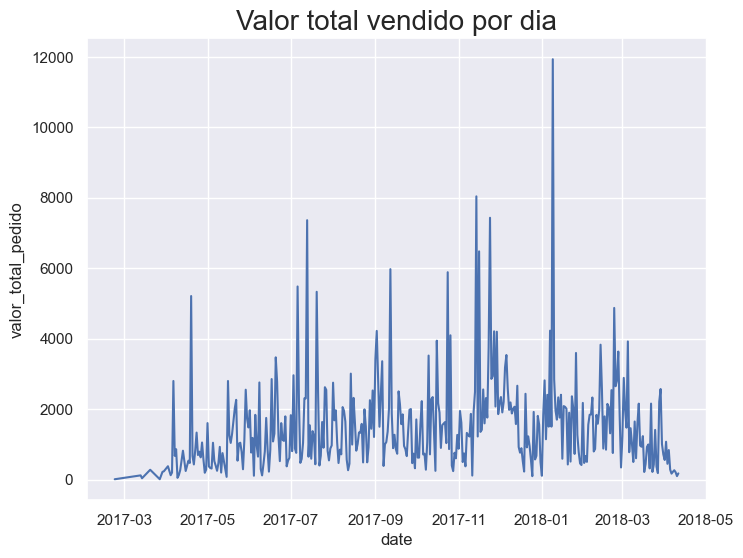

In [52]:
ingresos_por_fecha = df.groupby('date', as_index=False).valor_total_pedido.sum()
ax = sns.lineplot(x= 'date', y='valor_total_pedido', data=ingresos_por_fecha)
plt.title('Valor total vendido por dia', fontsize=20);

Se observa que hay dos picos , comprobamos cuales son los veinte dias que mas valor de compra ha habido por dia.

In [54]:
top_20 = ingresos_por_fecha.nlargest(n = 20, columns = 'valor_total_pedido')
top_20

,date,valor_total_pedido
282,2018-01-09,11931.47
226,2017-11-14,8039.43
236,2017-11-24,7431.87
103,2017-07-13,7363.01
228,2017-11-16,6478.28
164,2017-09-12,5973.37
205,2017-10-24,5886.12
96,2017-07-06,5481.67
110,2017-07-20,5330.52
21,2017-04-19,5210.29


**INSIGHT 4**: El mayor numero de pedidos del año se produce en la semana de Black Friday. Y el día que más ingresos se genera es el 9 de enero. Plantear posibles campañas de marketing para Black Friday y para el 9 de enero.

El segundo y tercer dia que mas valor se ha generado vendiendo ha sido en la semana del Black Friday.
Comprobamos si se ha producido en algún día festivo:

In [55]:
fechas_secundario_set = set(top_20['date'])
fechas_secundario_set

{datetime.date(2017, 4, 19),
 datetime.date(2017, 7, 6),
 datetime.date(2017, 7, 13),
 datetime.date(2017, 7, 20),
 datetime.date(2017, 9, 2),
 datetime.date(2017, 9, 12),
 datetime.date(2017, 10, 16),
 datetime.date(2017, 10, 24),
 datetime.date(2017, 10, 26),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 16),
 datetime.date(2017, 11, 23),
 datetime.date(2017, 11, 24),
 datetime.date(2017, 11, 27),
 datetime.date(2017, 11, 29),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 23),
 datetime.date(2018, 3, 5)}

Comprobamos si en los 20 dias ha coincidido con los días festivos.

In [56]:
coincidencia = df[df['date'].isin(fechas_secundario_set)]
coincidencia[coincidencia.festivos == 1]

,estatus,valor_productos,gastos_envio,cantidad_producto,cantidad_vendedores,ciudad_cliente,categoria_producto,valor_total_pedido,date,año,mes,dia,hora,minuto,segundo,festivos,gastos_envio_por_producto
fecha,,,,,,,,,,,,,,,,,


Sigue sin haber relación con los días festivos.

### ¿Cuál es la cantidad de producto por pedido? 

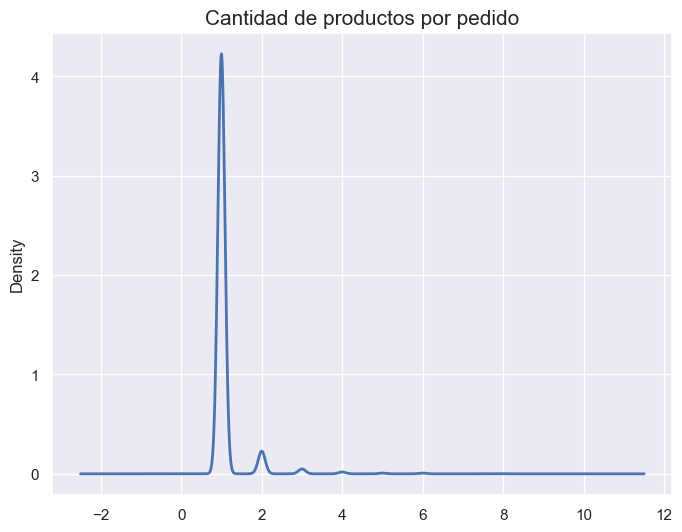

In [57]:
df.cantidad_producto.plot(kind = 'density',
                          linewidth = 2)
plt.title('Cantidad de productos por pedido', fontsize = 15);

**INSIGHT 5** :
La mayoria de pedidos se realizan con únicamente un producto , habría que tratar de aumentar el numero de productos por pedido. Por otra parte, como no tenemos los identificadores de clientes tampoco podemos saber si un cliente ha comprado en distintos pedidos.

### ¿Momentos de la verdad?

¿Podríamos llegar a identificar momentos a nivel de día-hora en los que se producen el mayor número de compras?

Sería muy útil para concentrar gran parte de la inversión de campañas justo en esos momentos.

In [73]:
compras_dia_hora = df.groupby(['date','hora']).cantidad_producto.sum().unstack(level = 0).fillna(0)
compras_dia_hora

date,2017-02-22,2017-03-13,2017-03-14,2017-03-20,2017-03-27,2017-03-29,2017-03-30,2017-04-02,2017-04-04,2017-04-05,...,2018-04-02,2018-04-03,2018-04-04,2018-04-05,2018-04-06,2018-04-07,2018-04-08,2018-04-09,2018-04-10,2018-04-11
hora,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


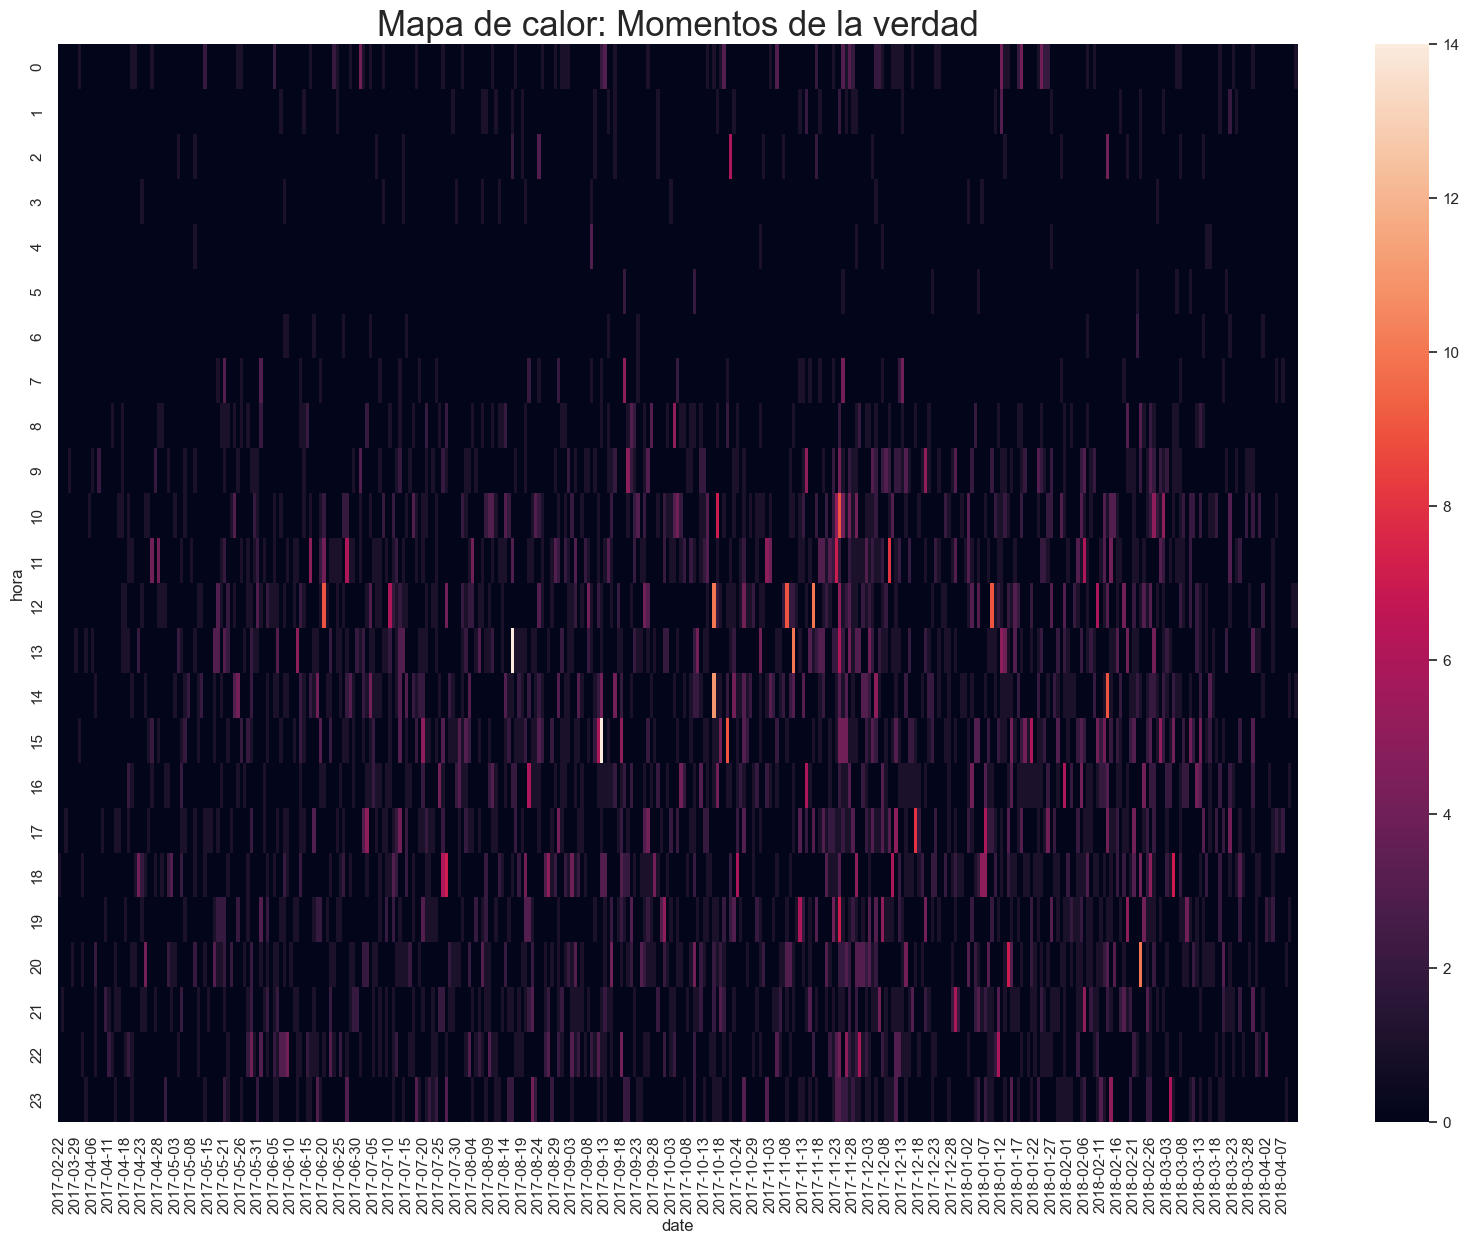

In [79]:
plt.figure(figsize = (20,14))
sns.heatmap(compras_dia_hora)
plt.title('Mapa de calor: Momentos de la verdad', fontsize = 25);

**INSIGHT 6**: Se puede apreciar que las horas que más productos se compran son entre las 12:00 y las 15:00. Y sobre todo entre Agosto y Noviembre. 

# CONCLUSIONES

Se han obtenido distintos INSIGHTS que son clave de conocer y entender para poder tomar las medidas oportunas. Estas acciones ayudarán a ejecutar las palancas permitiendo de esta manera aumentar ingresos.

## PALANCAS
* Reducir gastos de envío
* Aumentar numero de pedidos
* Reducir pedidos cancelados

Tenemos los KPI para medir las palancas:

## KPI
* Numero total de productos vendidos: 3948
* Ingresos totales: 563146
* Porcentaje de gastos de envio en las ventas: 14%
* Tasa de pedidos cancelados: 1,67%

## Acciones de mejora logística

1. Mejorar las condiciones logísticas de las ciudades que más gastos de envío sufren ya que repercute directamente en los pedidos y por tanto ingresos. Por ejemplo en Fortaleza y Belem.

## Acciones de reducción de pedidos cancelados

3. Ofrecer incentivos en Salvador, la ciudad que más pedidos son cancelados: Ofrecer descuentos o promociones especiales para alentar a los clientes a completar sus compras y reducir la probabilidad de cancelación.
4. Mejorar la visibilidad del inventario: Asegurarse de que los productos que se muestran en tu sitio web estén en stock. Implementar un sistema que actualice automáticamente el inventario para evitar pedidos de productos agotados.

## Acciones para mejorar venta de productos

5. Destacar los productos más vendidos, en este caso decoración, accesorios de informática y cama mesa y baño: Asegurarse de que los productos más populares están destacados en la página principal y en las páginas de categorías relevantes. Utilizar imágenes atractivas, descripciones detalladas y reseñas de clientes para resaltar sus beneficios.
6. Fomentar la recomendación: Implementar programas de referidos o de afiliados para incentivar a los clientes a recomendar los productos más vendidos a sus amigos y familiares.
7. Realizar un plan de marketing durante la semana del Black Friday ya que es la que más se vende y el 9 de enero, que es la que más ingresos genera.
8. Ofertas y promociones especiales entre las 12:00h y 15:00h : Crear ofertas y promociones especiales que estén disponibles exclusivamente durante ese período de tiempo. Esto puede motivar a los clientes a realizar compras durante esas horas específicas para aprovechar los descuentos.

## Acciones de incremento de frecuencia de compra

9. La mayoria de pedidos se realizan con únicamente un producto , habría que tratar de aumentar el numero de productos por pedido.
9. Crear una newsletter periódica con el nuevo recomendador para incrementar la frecuencia de visita